In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv("play_tennis.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,No
1,sunny,80.0,90.0,True,No
2,overcast,83.0,78.0,False,Yes
3,rainy,70.0,96.0,False,Yes
4,rainy,68.0,80.0,False,Yes


### ***Data Preprocessing***

In [3]:
one_hot_encoder = pd.get_dummies(df["Outlook"]).astype(int)
df = df.drop('Outlook', axis=1)
df = pd.concat([one_hot_encoder, df],axis=1)

df['Wind'] = df['Wind'].astype(int)

df["Play"] = df["Play"].replace(['Yes', 'No'], [1,0])
df.head()

,overcast,rainy,sunny,Temperature,Humidity,Wind,Play
0,0,0,1,85.0,85.0,0,0
1,0,0,1,80.0,90.0,1,0
2,1,0,0,83.0,78.0,0,1
3,0,1,0,70.0,96.0,0,1
4,0,1,0,68.0,80.0,0,1


### ***Train-Test Split***

In [4]:
X, y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42, shuffle=False)

### ***Train Extra Trees***

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    n_estimators=100,
    max_features='sqrt',
    bootstrap=False,  # Extra Trees typically doesn't use bootstrap
    random_state=42
)

et.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [6]:
pred_y = et.predict(X_test)

0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.82      1.00      0.90         9

    accuracy                           0.86        14
   macro avg       0.91      0.80      0.82        14
weighted avg       0.88      0.86      0.85        14



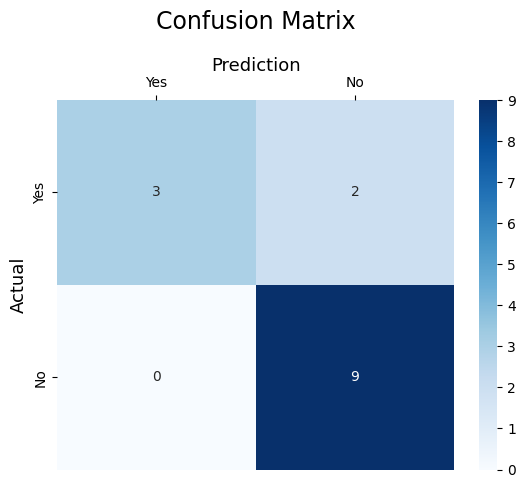

In [7]:
print(accuracy_score(y_test,pred_y))
print(classification_report(y_test,pred_y))

cm = confusion_matrix(y_test,pred_y)
sns.heatmap(cm, 
            annot=True,
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'],
            cmap="Blues")
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

plt.show()

### ***Visualizations for trees 1 & 2***

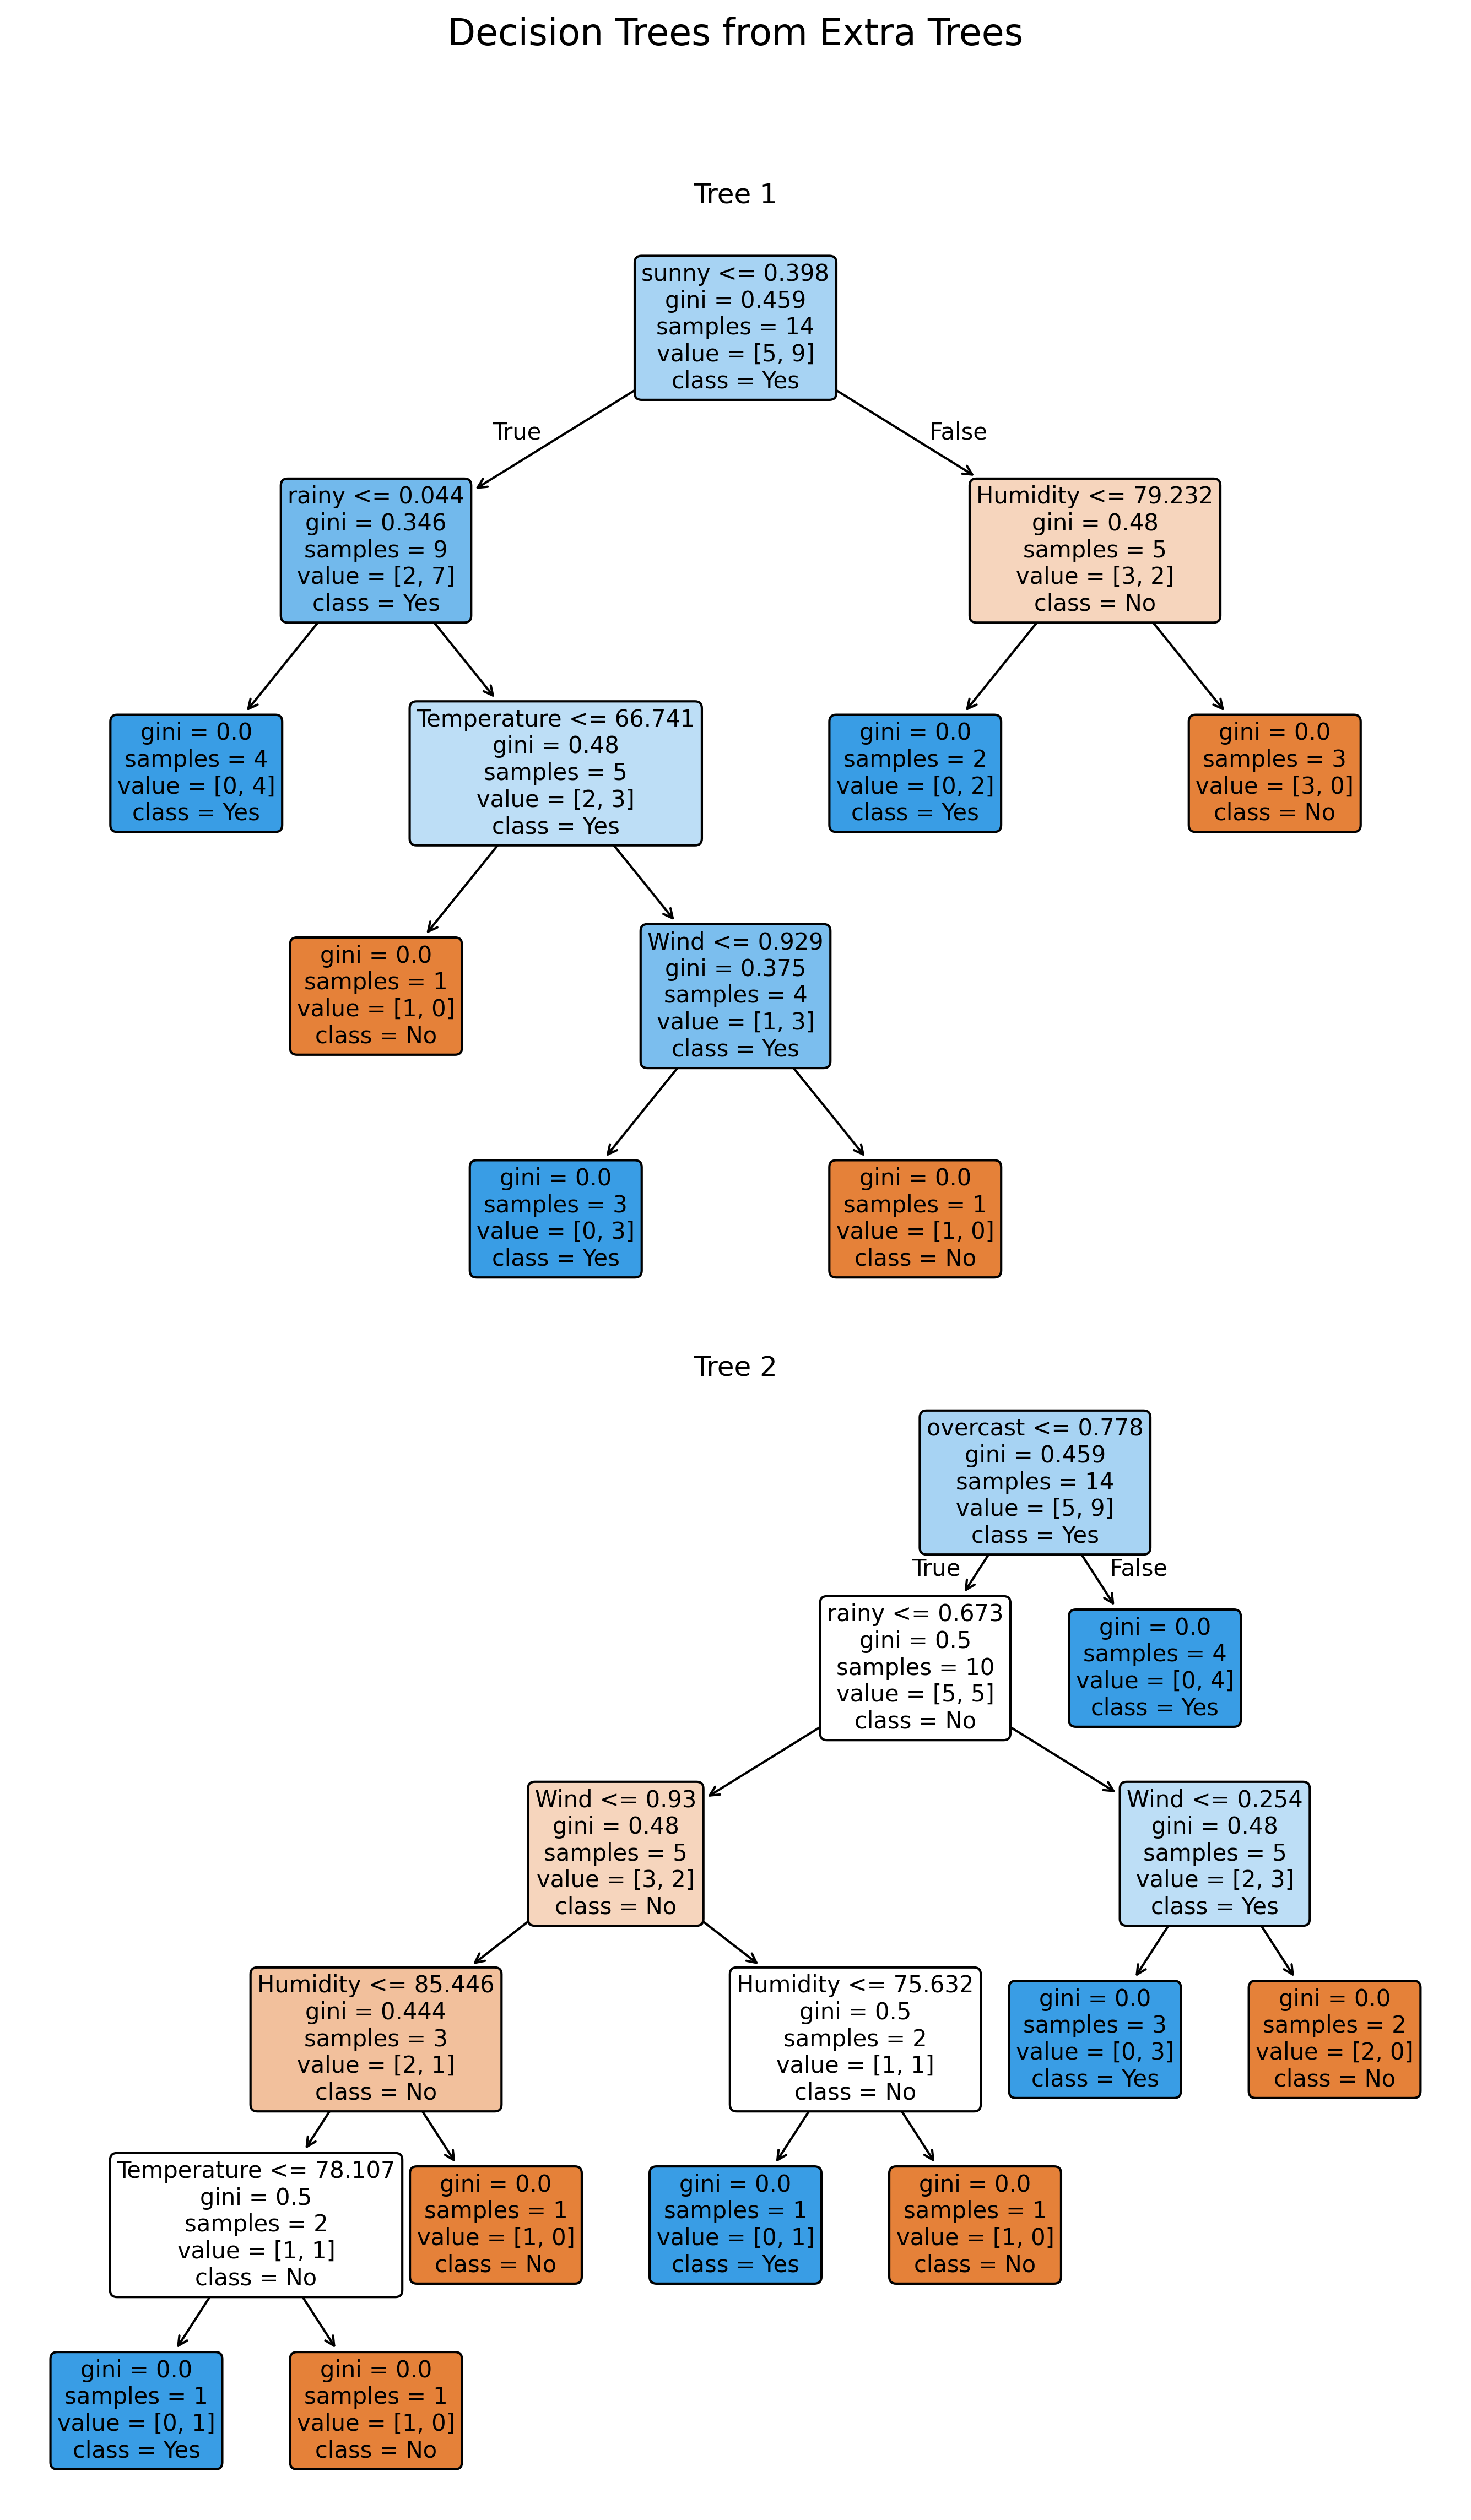

In [18]:
# Create visualizations for trees 1 and 2
trees_to_show = [0, 1]  # Python uses 0-based indexing
feature_names = X_train.columns.tolist()
class_names = ['No', 'Yes']

# Set up the plot
fig, axes = plt.subplots(2, 1, figsize=(9, 16), dpi=300)  # Reduced height, increased DPI
fig.suptitle('Decision Trees from Extra Trees', fontsize=16)

# Plot each tree
for idx, tree_idx in enumerate(trees_to_show):
    plot_tree(et.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=10) 
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])